===== DỰ BÁO THỜI TIẾT ===== 

Nhập thành phố / địa điểm bạn muốn kiểm tra thời tiết : hà nội 

Mon, 09 Apr 2018 04:10 PM ICT (Hà Nội Vietnam  Hanoi) Partly Cloudy ,Nhiệt Độ Thấp Nhất 15*C ,Nhiệt Độ Cao Nhất 26*C

      Datetime  Day              Description Max Min
0  10 Apr 2018  Tue            Partly Cloudy  27  20
1  11 Apr 2018  Wed            Partly Cloudy  29  23
2  12 Apr 2018  Thu            Partly Cloudy  32  24
3  13 Apr 2018  Fri             Mostly Sunny  34  25
4  14 Apr 2018  Sat            Thunderstorms  32  25
5  15 Apr 2018  Sun            Thunderstorms  25  22
6  16 Apr 2018  Mon  Scattered Thunderstorms  23  21
7  17 Apr 2018  Tue            Mostly Cloudy  23  20
8  18 Apr 2018  Wed            Mostly Cloudy  25  20


Text(0.5,1,'Biểu đồ nhiệt độ dự báo thời tiết cho Hà Nội Vietnam 9 ngày')

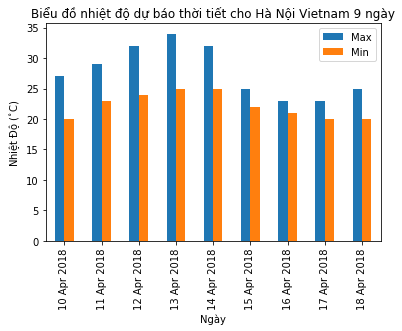

In [5]:
import requests
import json
import urllib.parse
import pandas as pd
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt


print("===== DỰ BÁO THỜI TIẾT ===== \n")
name = str(input('Nhập thành phố / địa điểm bạn muốn kiểm tra thời tiết : '))
baseurl = "https://query.yahooapis.com/v1/public/yql?"
yql_query = "select * from weather.forecast where woeid in (select woeid from geo.places(1) where text=\"" + str(
    name) + "\") and u=\"c\""
yql_url = baseurl + urllib.parse.urlencode({'q': yql_query}) + "&format=json"
result = requests.get(yql_url)
data = result.json()

d = data['query']['results']['channel']['item']['forecast']
days = []
dates = []
lows = []
highs = []
texts = []

city = data['query']['results']['channel']['location']['city']
country = data['query']['results']['channel']['location']['country']
region = data['query']['results']['channel']['location']['region']
text = data['query']['results']['channel']['item']['condition']['text']
low = data['query']['results']['channel']['item']['forecast'][0]['low']
high = data['query']['results']['channel']['item']['forecast'][0]['high']
lastUptate = data['query']['results']['channel']['lastBuildDate']

print('\n' + lastUptate + " " + "(" + city + " " + country + " " + region + ")"
 + " " + text + " ,Nhiệt Độ Thấp Nhất " + low + "*C" + " ,Nhiệt Độ Cao Nhất " + high + "*C"'\n')

for i in range(1, len(d)):
    day = data['query']['results']['channel']['item']['forecast'][i]['day']
    date = data['query']['results']['channel']['item']['forecast'][i]['date']
    low = data['query']['results']['channel']['item']['forecast'][i]['low']
    high = data['query']['results']['channel']['item']['forecast'][i]['high']
    text = data['query']['results']['channel']['item']['forecast'][i]['text']
    days.append(day)
    dates.append(date)
    lows.append(low)
    highs.append(high)
    texts.append(text)
df = pd.DataFrame({'Day': days,
                   'Datetime': dates,
                   'Min': lows,
                   'Max': highs,
                   'Description': texts})
print(df)
df.Max = df.Max.astype(float)
df.Min = df.Min.astype(float)
df.plot.bar(x='Datetime')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt Độ ($^{\circ}$C)')
plt.title('Biểu đồ nhiệt độ dự báo thời tiết cho ' + city +
          ' ' + country + ' ' + str(len(d) - 1) + ' ngày')
